<a href="https://colab.research.google.com/github/azarcoder/pytorch_udemy/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST handwritten digits

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#Load and Prepare the MNIST Dataset
'''
MNIST is a dataset of 70,000 black-and-white images of handwritten digits (0–9).

train_images = 60,000 images the model learns from.

test_images = 10,000 images to test if it learned well.

Each image is 28x28 pixels, grayscale.
'''
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
'''
reshape: CNNs expect data with a channel dimension, even if grayscale. So (28,28) becomes (28,28,1).

astype('float32'): CNNs work better with float numbers.

/255: We normalize pixel values from [0-255] to [0-1] for better training
'''

"\nreshape: CNNs expect data with a channel dimension, even if grayscale. So (28,28) becomes (28,28,1).\n\nastype('float32'): CNNs work better with float numbers.\n\n/255: We normalize pixel values from [0-255] to [0-1] for better training\n"

In [4]:
model = models.Sequential()

# 1st Convolution + ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

'''
Explantion : layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))

32 filters of size 3x3 scan the image.

Each filter learns to detect specific features (like corners or edges).

activation='relu' adds non-linearity to learn complex things.
'''

# 1st Pooling
model.add(layers.MaxPooling2D((2, 2)))

'''
It looks at a 2x2 square of pixels and only keeps the biggest number (most important part). This reduces the image size.

Reduces dimensions to speed up training and reduce overfitting.

Keeps only the most "active" part of the feature.
'''

# 2nd Convolution + ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2nd Pooling
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolution
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

'''
Repeating Conv + Pooling

Why do this again?
First conv detects basic things like lines.
Second/third conv detect patterns built on those — like loops or full digits.
'''

# Flatten before dense layers
model.add(layers.Flatten())
'''
After all the pattern finding, we lay the image flat into one long row of numbers. We need this flat form to make a decision.
Converts 3D output (from convolutional layers) to 1D for the dense layer (fully connected layer).
'''
# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))
#softmax gives probabilities for each digit (0–9).

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
optimizer='adam': Smart method to adjust the model's weights.

loss='sparse_categorical_crossentropy': Good for multi-class problems with integer labels.

metrics=['accuracy']: Track how often it guesses correctly.
'''

"\noptimizer='adam': Smart method to adjust the model's weights.\n\nloss='sparse_categorical_crossentropy': Good for multi-class problems with integer labels.\n\nmetrics=['accuracy']: Track how often it guesses correctly.\n"

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

'''
Trains the model for 5 times over the whole training set.

After each round (epoch), it checks its performance on test data.
'''

In [10]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 1s - 2ms/step - accuracy: 0.9909 - loss: 0.0339
Test Accuracy: 0.99


In [11]:
# Predict the new data
predictions = model.predict(test_images)
print("Predicted label for first test image:", tf.argmax(predictions[0]).numpy())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first test image: 7


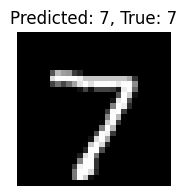

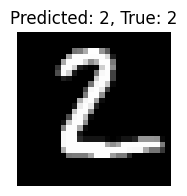

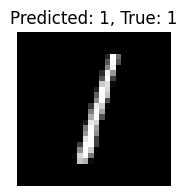

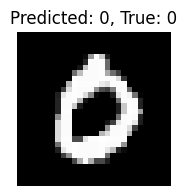

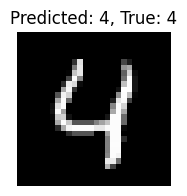

In [15]:
import numpy as np

# Show first 5 test images and their predictions
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")
    plt.axis('off')
    plt.show()


In [17]:
model.save('mnist_cnn_model.keras')

#Title


In [18]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
# Load your trained model
model = tf.keras.models.load_model('/content/mnist_cnn_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [61]:
from google.colab import files
uploaded = files.upload()

Saving 090.png to 090.png


In [62]:
# Load your image (ensure it's a white digit on black background ideally)
image = cv2.imread("090.png", cv2.IMREAD_GRAYSCALE)
original = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

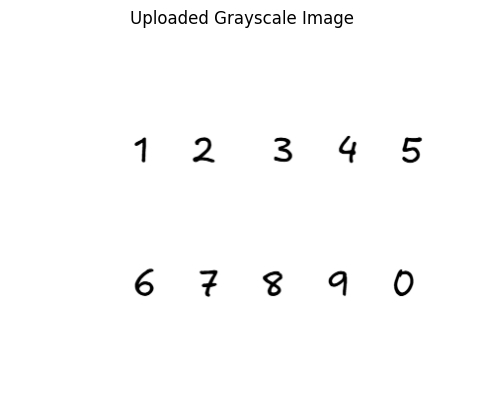

In [63]:
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Uploaded Grayscale Image")
plt.axis("off")
plt.show()

In [64]:
# Adaptive thresholding
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV, 15, 10)

'''
Converts the image into black and white where digits become white on black background.

Uses adaptive thresholding, which is smart for images with light/shadow variations.
'''

# Dilate to connect components
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

'''
If a digit is broken into small pieces (like "5" or "3"), dilation connects them into one blob.
'''

# Find contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

boxes = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = w * h
    aspect_ratio = w / float(h)

    # Reject boxes that are too flat, tall-narrow, or small
    if area < 100 or w < 10 or h < 10:
        continue
    if aspect_ratio < 0.2 or aspect_ratio > 1.2:
        continue

    boxes.append((x, y, w, h))

# Sort boxes top to bottom, then left to right within lines
boxes = sorted(boxes, key=lambda b: (b[1] // 20, b[0]))

for x, y, w, h in boxes:
    digit = thresh[y:y+h, x:x+w]

    # Resize keeping aspect ratio
    if h > w:
        w_new = max(1, int((20 / h) * w))
        h_new = 20
    else:
        h_new = max(1, int((20 / w) * h))
        w_new = 20

    digit_resized = cv2.resize(digit, (w_new, h_new))

    # Center it in 28x28 image
    canvas = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - w_new) // 2
    y_offset = (28 - h_new) // 2
    canvas[y_offset:y_offset+h_new, x_offset:x_offset+w_new] = digit_resized

    # Predict
    input_digit = canvas.astype('float32') / 255.0
    input_digit = input_digit.reshape(1, 28, 28, 1)
    pred = model.predict(input_digit, verbose=0)
    pred_class = np.argmax(pred)

    # Draw red box and label
    cv2.rectangle(original, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(original, str(pred_class), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                0.9, (0, 0, 255), 2)


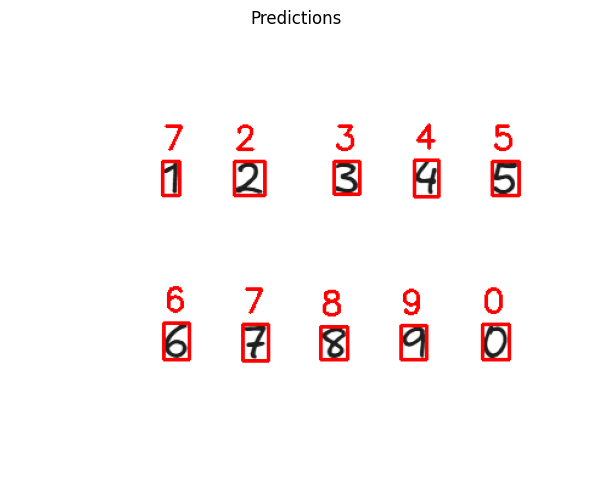

In [65]:
# Show final result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Predictions")
plt.axis("off")
plt.show()